<a href="https://colab.research.google.com/github/bmreiniger/datascience.stackexchange/blob/master/stats514645.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

In [ ]:
X, y = fetch_california_housing(return_X_y=True, as_frame=True)

In [32]:
params = {
    "reg_lambda": 0,
    "reg_alpha": 0,
    "gamma": 10,
}

vanilla = []
scaled = []
rescaled = []
for i in range(50):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=i)

    reg1 = XGBRegressor(**params, random_state=42)
    reg1.fit(X_train, y_train)
    vanilla.append(reg1.score(X_test, y_test))

    reg2 = XGBRegressor(**params, random_state=42)  # not strictly needed, I think
    reg2.fit(X_train, y_train * 1000)
    scaled.append(reg2.score(X_test, y_test * 1000))

    sc_params = {
        "reg_lambda": params["reg_lambda"],
        "reg_alpha": 1000*params["reg_alpha"],
        "gamma": 1000**2 * params["gamma"],
    }
    reg3 = XGBRegressor(**sc_params, random_state=42)
    reg3.fit(X_train, y_train * 1000)
    rescaled.append(reg3.score(X_test, y_test * 1000))


{'reg_lambda': 0, 'reg_alpha': 10, 'gamma': 0}


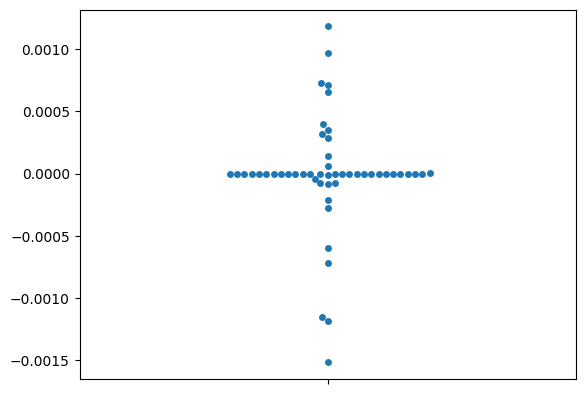

In [ ]:
import seaborn as sns
import numpy as np
print(params)
sns.swarmplot(np.array(vanilla) - np.array(rescaled));

<Axes: >

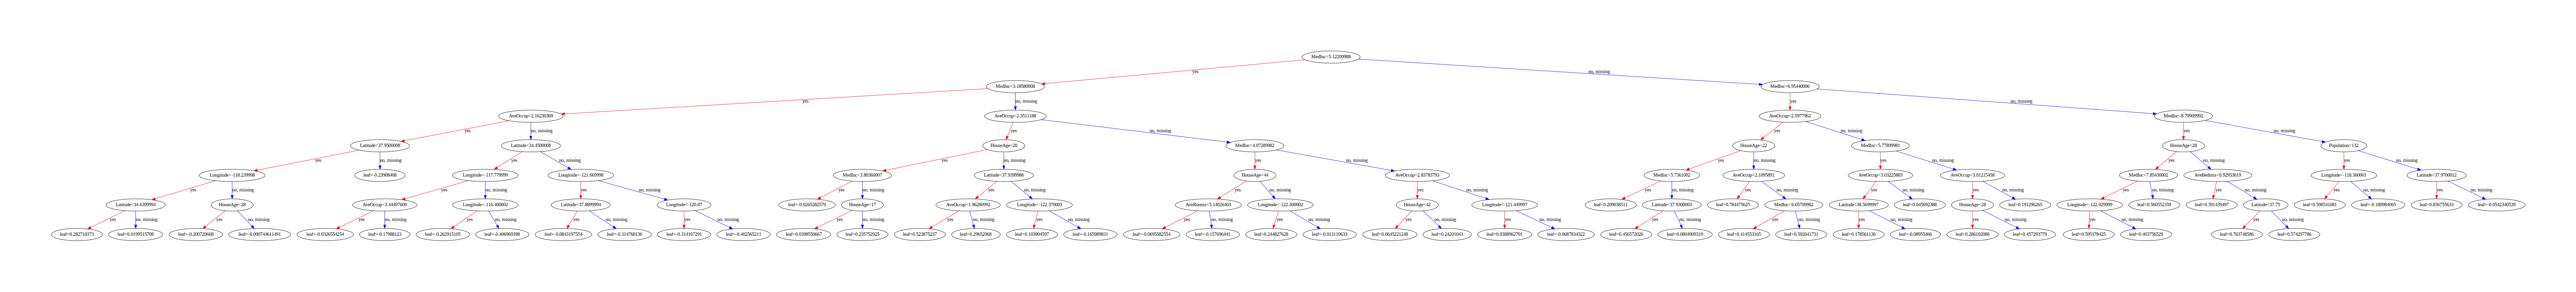

In [33]:
# gamma > 0 prunes the tree more after up-scaling the target:
from xgboost import plot_tree
from matplotlib import pyplot as plt
fig, ax = plt.subplots(dpi=1500)
plot_tree(reg1, ax=ax)
# print(reg1.get_booster().get_dump(dump_format='json')[0])

<Axes: >

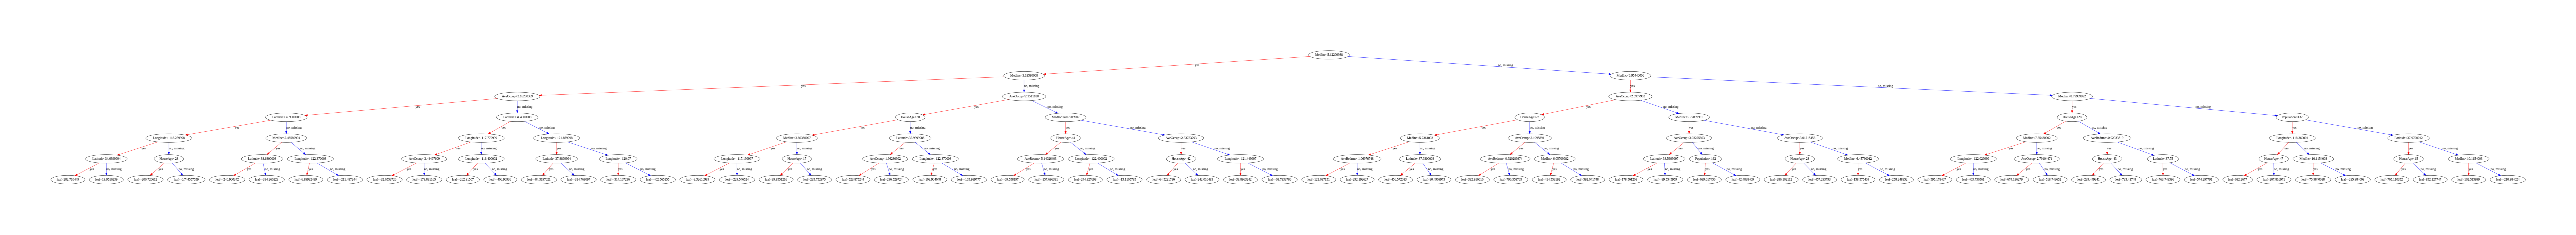

In [34]:
fig, ax = plt.subplots(dpi=1500)
plot_tree(reg2, ax=ax)
# print(reg2.get_booster().get_dump(dump_format='json')[0])

Below here are past runs plotting vanilla-scaled.

You can see the differences when alpha or gamma are positive, and just a few blips otherwise (worth investigating another time perhaps).

{'reg_lambda': 10, 'reg_alpha': 0, 'gamma': 0}


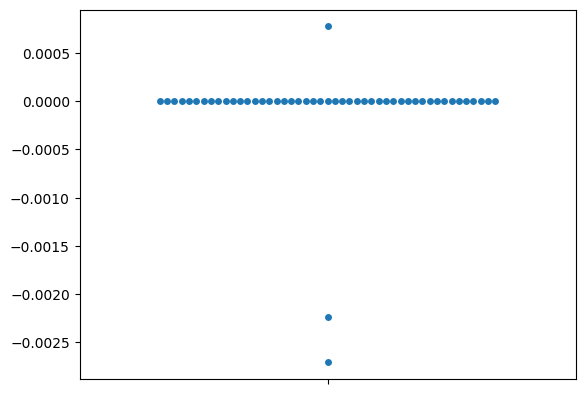

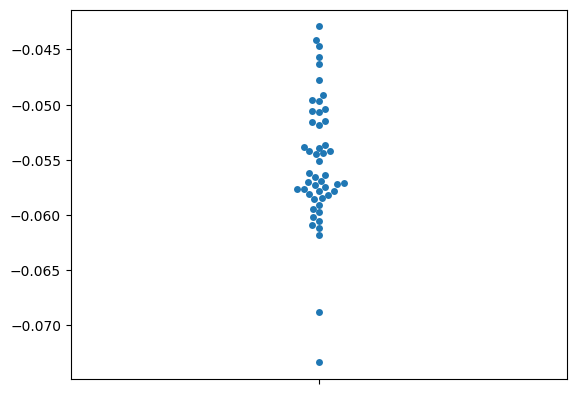

In [ ]:
# 10, alpha=0, 10

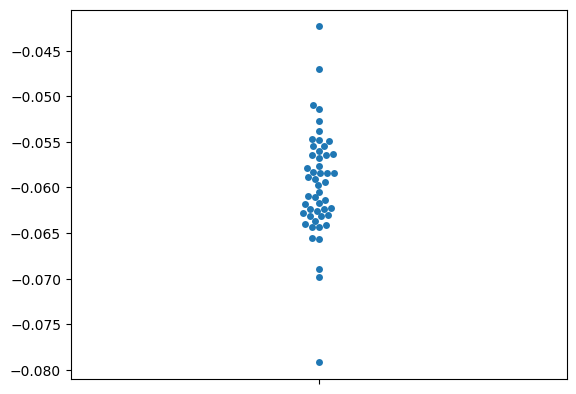

In [ ]:
# all three regularizations = 10

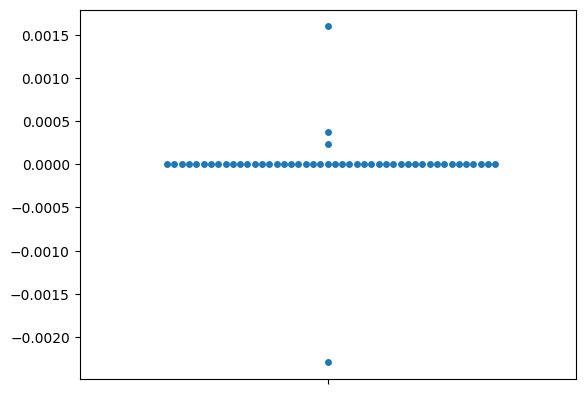

In [ ]:
# default hyperparameters